Columns detected: ['user_id', 'total_transactions', 'total_revenue', 'avg_purchase', 'cumulative_revenue_pct', 'value_segment']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5891 non-null   int64  
 1   total_transactions      5891 non-null   int64  
 2   total_revenue           5891 non-null   float64
 3   avg_purchase            5891 non-null   float64
 4   cumulative_revenue_pct  5891 non-null   float64
 5   value_segment           5891 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 276.3+ KB

Missing values:
 user_id                   0
total_transactions        0
total_revenue             0
avg_purchase              0
cumulative_revenue_pct    0
value_segment             0
dtype: int64
Final shape: (5891, 6)


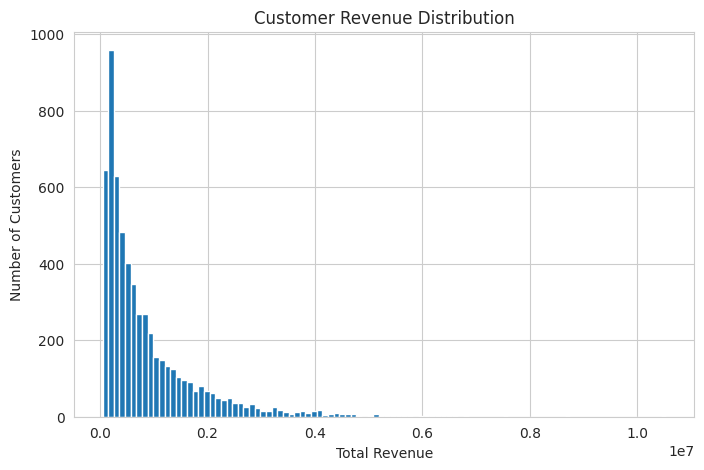

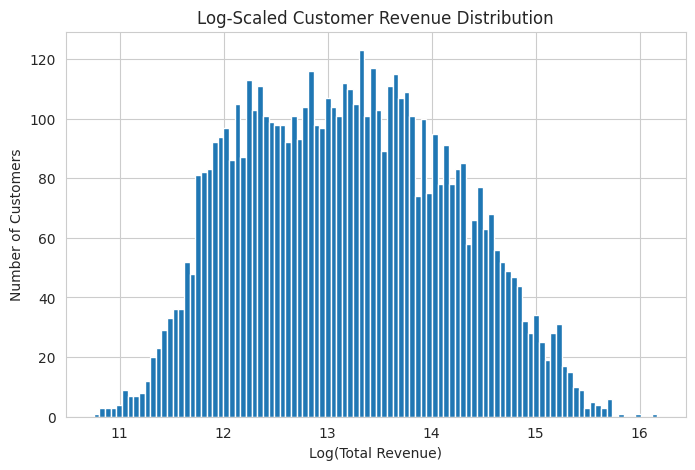

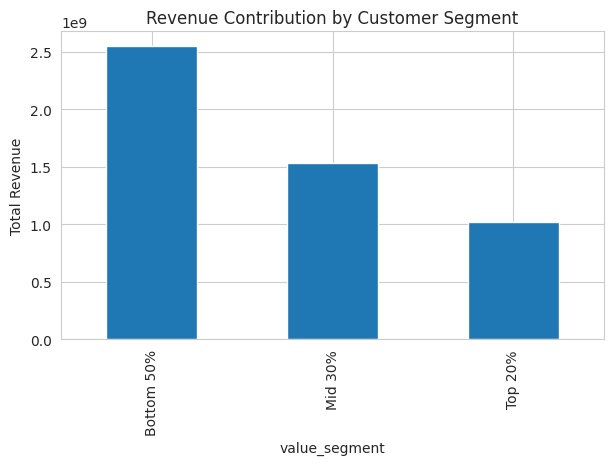

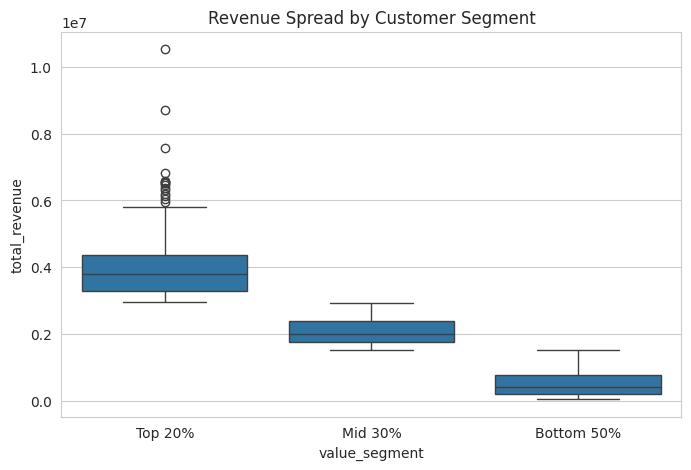

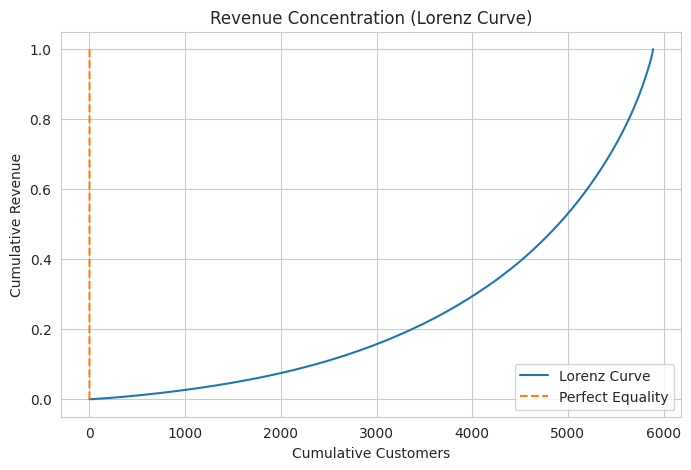

Current Top 20% Revenue: 1016962840.0
5% Retention Uplift: 50848142.0
Estimated AOV Gain: 526351264.84
Exported: customer_segments_enriched.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


df = pd.read_csv(
    "customer_segments.csv",
    sep=None,
    engine="python"
)


df.columns = df.columns.str.strip()

print("Columns detected:", df.columns.tolist())
df.head()


numeric_cols = [
    "user_id",
    "total_transactions",
    "total_revenue",
    "avg_purchase",
    "cumulative_revenue_pct"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["value_segment"] = df["value_segment"].astype(str)

df.info()

print("\nMissing values:\n", df.isna().sum())

df = df.drop_duplicates(subset="user_id")
print("Final shape:", df.shape)


df[["total_revenue", "total_transactions", "avg_purchase"]].describe()


plt.hist(df["total_revenue"], bins=100)
plt.title("Customer Revenue Distribution")
plt.xlabel("Total Revenue")
plt.ylabel("Number of Customers")
plt.show()


plt.hist(np.log1p(df["total_revenue"]), bins=100)
plt.title("Log-Scaled Customer Revenue Distribution")
plt.xlabel("Log(Total Revenue)")
plt.ylabel("Number of Customers")
plt.show()


df["value_segment"].value_counts()

segment_revenue = (
    df.groupby("value_segment")["total_revenue"]
      .sum()
      .sort_values(ascending=False)
)

segment_revenue


plt.figure(figsize=(7, 4))
segment_revenue.plot(kind="bar")
plt.title("Revenue Contribution by Customer Segment")
plt.ylabel("Total Revenue")
plt.show()


segment_behavior = (
    df.groupby("value_segment")[["total_transactions", "avg_purchase"]]
      .mean()
)

segment_behavior


sns.boxplot(x="value_segment", y="total_revenue", data=df)
plt.title("Revenue Spread by Customer Segment")
plt.show()


sorted_revenue = np.sort(df["total_revenue"])
cum_revenue = np.cumsum(sorted_revenue) / np.sum(sorted_revenue)

plt.plot(cum_revenue, label="Lorenz Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Equality")
plt.title("Revenue Concentration (Lorenz Curve)")
plt.xlabel("Cumulative Customers")
plt.ylabel("Cumulative Revenue")
plt.legend()
plt.show()


top_20 = df[df["value_segment"] == "Top 20%"]

current_revenue = top_20["total_revenue"].sum()
uplift_5pct = current_revenue * 0.05

print("Current Top 20% Revenue:", round(current_revenue, 2))
print("5% Retention Uplift:", round(uplift_5pct, 2))


aov_uplift_pct = 0.10

estimated_aov_gain = (
    df["avg_purchase"].mean()
    * aov_uplift_pct
    * df["total_transactions"].sum()
)

print("Estimated AOV Gain:", round(estimated_aov_gain, 2))


df.to_csv("customer_segments_enriched.csv", index=False)
print("Exported: customer_segments_enriched.csv")
